In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
%matplotlib inline

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



In [3]:
df = pd.read_csv('/content/drive/MyDrive/WORKING/Kaggle/Дата-Сеты с Kaggle/weatherAUS (1).csv')


In [4]:
col_names=df.columns
col_names

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')

In [5]:
df.drop(['RISK_MM'], axis=1, inplace=True)


In [6]:
categorical = [var for var in df.columns if df[var].dtype=='O']
print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :', categorical)
df[categorical].head()


There are 7 categorical variables

The categorical variables are : ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,W,W,WNW,No,No
1,2008-12-02,Albury,WNW,NNW,WSW,No,No
2,2008-12-03,Albury,WSW,W,WSW,No,No
3,2008-12-04,Albury,NE,SE,E,No,No
4,2008-12-05,Albury,W,ENE,NW,No,No


In [7]:
df[categorical].isnull().sum()


Date                0
Location            0
WindGustDir     17523
WindDir9am      18477
WindDir3pm      10194
RainToday        7099
RainTomorrow     7100
dtype: int64

In [8]:
cat1 = [var for var in categorical if df[var].isnull().sum()!=0]
print(df[cat1].isnull().sum())


WindGustDir     17523
WindDir9am      18477
WindDir3pm      10194
RainToday        7099
RainTomorrow     7100
dtype: int64


In [9]:
for var in categorical:
  print(df[var].value_counts())

2017-07-17    49
2015-12-15    49
2015-12-03    49
2015-12-04    49
2015-12-05    49
              ..
2007-11-29     1
2007-11-28     1
2007-11-27     1
2007-11-26     1
2008-01-31     1
Name: Date, Length: 5324, dtype: int64
Canberra            5324
Sydney              5232
Darwin              5081
Hobart              5081
Brisbane            5081
Melbourne           5081
Perth               5080
Wollongong          4928
AliceSprings        4928
Launceston          4928
Townsville          4928
GoldCoast           4928
Cairns              4928
Albury              4928
Tuggeranong         4927
Albany              4927
MountGambier        4927
Penrith             4927
Ballarat            4926
Bendigo             4919
MountGinini         4916
Williamtown         4897
Richmond            4897
Cobar               4897
CoffsHarbour        4897
Moree               4897
Woomera             4897
WaggaWagga          4897
NorfolkIsland       4897
Dartmoor            4897
Watsonia            4897

In [10]:
for var in categorical:
  print(df[var].value_counts()/np.float(len(df)))

2017-07-17    0.000208
2015-12-15    0.000208
2015-12-03    0.000208
2015-12-04    0.000208
2015-12-05    0.000208
                ...   
2007-11-29    0.000004
2007-11-28    0.000004
2007-11-27    0.000004
2007-11-26    0.000004
2008-01-31    0.000004
Name: Date, Length: 5324, dtype: float64
Canberra            0.022588
Sydney              0.022198
Darwin              0.021557
Hobart              0.021557
Brisbane            0.021557
Melbourne           0.021557
Perth               0.021553
Wollongong          0.020908
AliceSprings        0.020908
Launceston          0.020908
Townsville          0.020908
GoldCoast           0.020908
Cairns              0.020908
Albury              0.020908
Tuggeranong         0.020904
Albany              0.020904
MountGambier        0.020904
Penrith             0.020904
Ballarat            0.020900
Bendigo             0.020870
MountGinini         0.020857
Williamtown         0.020776
Richmond            0.020776
Cobar               0.020776
CoffsHarbo

<ipython-input-10-fe3050cc037c>:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  print(df[var].value_counts()/np.float(len(df)))
<ipython-input-10-fe3050cc037c>:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  print(df[var].value_counts()/np.float(len(df)))
<ipython-input-10-fe3050cc037c>:2: DeprecationWarning: `np.float` is a deprecated 

N      0.077777
SE     0.064044
E      0.063819
SSE    0.062554
S      0.058677
NW     0.058210
SW     0.057446
W      0.056814
NNE    0.055613
ESE    0.054934
ENE    0.054107
NNW    0.053568
SSW    0.052372
WNW    0.052283
NE     0.052045
WSW    0.047344
Name: WindDir9am, dtype: float64
SE     0.071850
W      0.068392
S      0.065842
WSW    0.064913
SW     0.061948
SSE    0.061905
WNW    0.060989
N      0.059385
ESE    0.058948
NW     0.057722
SSW    0.057098
E      0.057073
NE     0.056988
ENE    0.054128
NNW    0.052945
NNE    0.046623
Name: WindDir3pm, dtype: float64
No     0.754148
Yes    0.215733
Name: RainToday, dtype: float64
No     0.754170
Yes    0.215707
Name: RainTomorrow, dtype: float64


<ipython-input-10-fe3050cc037c>:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  print(df[var].value_counts()/np.float(len(df)))
<ipython-input-10-fe3050cc037c>:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  print(df[var].value_counts()/np.float(len(df)))


In [11]:
for var in categorical:
  print(var, 'contains', len(df[var].unique()), 'labels')

Date contains 5324 labels
Location contains 49 labels
WindGustDir contains 17 labels
WindDir9am contains 17 labels
WindDir3pm contains 17 labels
RainToday contains 3 labels
RainTomorrow contains 3 labels


In [12]:
df['RainTomorrow'].unique()

array(['No', 'Yes', nan], dtype=object)

In [13]:
df['Date'].dtypes

dtype('O')

In [14]:
df['Date']=pd.to_datetime(df['Date'])

In [15]:
df['Year']=df['Date'].dt.year
df['Year'].head()

0    2008
1    2008
2    2008
3    2008
4    2008
Name: Year, dtype: int64

In [16]:
df['Month']=df['Date'].dt.month
df['Month'].head()

0    12
1    12
2    12
3    12
4    12
Name: Month, dtype: int64

In [17]:
# extract day from date

df['Day'] = df['Date'].dt.day

df['Day'].head()

0    1
1    2
2    3
3    4
4    5
Name: Day, dtype: int64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235699 entries, 0 to 235698
Data columns (total 26 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           235699 non-null  datetime64[ns]
 1   Location       235699 non-null  object        
 2   MinTemp        231644 non-null  float64       
 3   MaxTemp        231781 non-null  float64       
 4   Rainfall       228600 non-null  float64       
 5   Evaporation    105766 non-null  float64       
 6   Sunshine       96111 non-null   float64       
 7   WindGustDir    218176 non-null  object        
 8   WindGustSpeed  218287 non-null  float64       
 9   WindDir9am     217222 non-null  object        
 10  WindDir3pm     225505 non-null  object        
 11  WindSpeed9am   231012 non-null  float64       
 12  WindSpeed3pm   227077 non-null  float64       
 13  Humidity9am    230180 non-null  float64       
 14  Humidity3pm    225751 non-null  float64       
 15  

In [19]:
df.drop('Date', axis=1, inplace=True)

In [20]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,1007.1,8.0,NaN,16.9,21.8,No,No,2008,12,1
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,1007.8,NaN,NaN,17.2,24.3,No,No,2008,12,2
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,1008.7,NaN,2.0,21.0,23.2,No,No,2008,12,3
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,1012.8,NaN,NaN,18.1,26.5,No,No,2008,12,4
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,5


In [21]:
categorical = [var for var in df.columns if df[var].dtype=='O']
print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :', categorical)


There are 6 categorical variables

The categorical variables are : ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [22]:
df[categorical].isnull().sum()

Location            0
WindGustDir     17523
WindDir9am      18477
WindDir3pm      10194
RainToday        7099
RainTomorrow     7100
dtype: int64

In [23]:
print('Location contains', len(df.Location.unique()), 'labels')


Location contains 49 labels


In [24]:
df.Location.unique()
df['Location'].value_counts()


Canberra            5324
Sydney              5232
Darwin              5081
Hobart              5081
Brisbane            5081
Melbourne           5081
Perth               5080
Wollongong          4928
AliceSprings        4928
Launceston          4928
Townsville          4928
GoldCoast           4928
Cairns              4928
Albury              4928
Tuggeranong         4927
Albany              4927
MountGambier        4927
Penrith             4927
Ballarat            4926
Bendigo             4919
MountGinini         4916
Williamtown         4897
Richmond            4897
Cobar               4897
CoffsHarbour        4897
Moree               4897
Woomera             4897
WaggaWagga          4897
NorfolkIsland       4897
Dartmoor            4897
Watsonia            4897
Sale                4897
MelbourneAirport    4897
SydneyAirport       4897
Mildura             4897
Portland            4897
Nuriootpa           4896
PerthAirport        4896
PearceRAAF          4896
Walpole             4893


In [25]:
test=pd.get_dummies(df.Location, drop_first=True).head()
test[test['Albury']==1]

,Albany,Albury,AliceSprings,BadgerysCreek,Ballarat,Bendigo,Brisbane,Cairns,Canberra,Cobar,...,Townsville,Tuggeranong,Uluru,WaggaWagga,Walpole,Watsonia,Williamtown,Witchcliffe,Wollongong,Woomera
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
df['WindGustDir']

0           W
1         WNW
2         WSW
3          NE
4           W
         ... 
235694    ENE
235695    SSE
235696     SE
235697      E
235698    ENE
Name: WindGustDir, Length: 235699, dtype: object

In [27]:
print('WindGustDir contains', len(df['WindGustDir'].unique()), 'labels')


WindGustDir contains 17 labels


In [28]:
df['WindGustDir'].unique()

array(['W', 'WNW', 'WSW', 'NE', 'NNW', 'N', 'NNE', 'SW', nan, 'ENE',
       'SSE', 'S', 'NW', 'SE', 'ESE', 'E', 'SSW'], dtype=object)

In [29]:
df.WindGustDir.value_counts()


W      15977
SE     15161
E      14946
S      14621
WSW    14541
SSW    14463
N      14457
SSE    14375
SW     14258
WNW    13351
ENE    13331
NW     13027
ESE    12342
NE     11773
NNW    10781
NNE    10772
Name: WindGustDir, dtype: int64

In [30]:
pd.get_dummies(df.WindGustDir, drop_first=True, dummy_na=True).head(100)


,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,NaN
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
96,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
97,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
98,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [31]:
df['WindGustDir']

0           W
1         WNW
2         WSW
3          NE
4           W
         ... 
235694    ENE
235695    SSE
235696     SE
235697      E
235698    ENE
Name: WindGustDir, Length: 235699, dtype: object

In [32]:
pd.get_dummies(df.WindGustDir, drop_first=True, dummy_na=True).sum(axis=0)

ENE    13331
ESE    12342
N      14457
NE     11773
NNE    10772
NNW    10781
NW     13027
S      14621
SE     15161
SSE    14375
SSW    14463
SW     14258
W      15977
WNW    13351
WSW    14541
NaN    17523
dtype: int64

In [33]:
print('WindDir9am contains', len(df['WindDir9am'].unique()), 'labels')


WindDir9am contains 17 labels


In [34]:
df['WindDir9am'].unique()

array(['W', 'NNW', 'SE', 'ENE', 'SW', 'SSE', 'S', 'NE', nan, 'SSW', 'N',
       'WSW', 'ESE', 'E', 'NW', 'WNW', 'NNE'], dtype=object)

In [35]:
df['WindDir9am'].value_counts()


N      18332
SE     15095
E      15042
SSE    14744
S      13830
NW     13720
SW     13540
W      13391
NNE    13108
ESE    12948
ENE    12753
NNW    12626
SSW    12344
WNW    12323
NE     12267
WSW    11159
Name: WindDir9am, dtype: int64

In [36]:
pd.get_dummies(df.WindDir9am, drop_first=True, dummy_na=True).head()


,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,NaN
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [37]:
pd.get_dummies(df.WindDir9am, drop_first=True, dummy_na=True).sum(axis=0)


ENE    12753
ESE    12948
N      18332
NE     12267
NNE    13108
NNW    12626
NW     13720
S      13830
SE     15095
SSE    14744
SSW    12344
SW     13540
W      13391
WNW    12323
WSW    11159
NaN    18477
dtype: int64

In [38]:
print('WindDir3pm contains', len(df['WindDir3pm'].unique()), 'labels')
df['WindDir3pm'].unique()


WindDir3pm contains 17 labels


array(['WNW', 'WSW', 'E', 'NW', 'W', 'SSE', 'ESE', 'ENE', 'NNW', 'SSW',
       'SW', 'SE', 'N', 'S', 'NNE', nan, 'NE'], dtype=object)

In [39]:
df['WindDir3pm'].value_counts()


SE     16935
W      16120
S      15519
WSW    15300
SW     14601
SSE    14591
WNW    14375
N      13997
ESE    13894
NW     13605
SSW    13458
E      13452
NE     13432
ENE    12758
NNW    12479
NNE    10989
Name: WindDir3pm, dtype: int64

In [40]:
pd.get_dummies(df.WindDir3pm, drop_first=True, dummy_na=True).head()


,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,NaN
0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [41]:
pd.get_dummies(df.WindDir3pm, drop_first=True, dummy_na=True).sum(axis=0)


ENE    12758
ESE    13894
N      13997
NE     13432
NNE    10989
NNW    12479
NW     13605
S      15519
SE     16935
SSE    14591
SSW    13458
SW     14601
W      16120
WNW    14375
WSW    15300
NaN    10194
dtype: int64

In [42]:
print('RainToday contains', len(df['RainToday'].unique()), 'labels')

RainToday contains 3 labels


In [43]:
df['RainToday'].unique()

array(['No', 'Yes', nan], dtype=object)

In [44]:
df.RainToday.value_counts()

No     177752
Yes     50848
Name: RainToday, dtype: int64

In [45]:
pd.get_dummies(df['RainToday'], drop_first=True, dummy_na=True).head().sum(axis=0)

Yes    0
NaN    0
dtype: int64

Проведем разведку числовых данных

In [46]:
numerical = [var for var in df.columns if df[var].dtype!='O']

In [47]:
numerical

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'Year',
 'Month',
 'Day']

In [48]:
print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)


There are 19 numerical variables

The numerical variables are : ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'Year', 'Month', 'Day']


In [49]:
df[numerical].head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month,Day
0,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,2008,12,1
1,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,2008,12,2
2,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,2008,12,3
3,9.2,28.0,0.0,NaN,NaN,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,2008,12,4
4,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,2008,12,5


In [50]:
df[numerical].isnull().sum()

MinTemp            4055
MaxTemp            3918
Rainfall           7099
Evaporation      129933
Sunshine         139588
WindGustSpeed     17412
WindSpeed9am       4687
WindSpeed3pm       8622
Humidity9am        5519
Humidity3pm        9948
Pressure9am       26042
Pressure3pm       26018
Cloud9am         104000
Cloud3pm         109710
Temp9am            4100
Temp3pm            8624
Year                  0
Month                 0
Day                   0
dtype: int64

In [51]:
print(round(df[numerical].describe()),2)


        MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
count  231644.0  231781.0  228600.0     105766.0   96111.0       218287.0   
mean       12.0      23.0       2.0          5.0       8.0           40.0   
std         6.0       7.0       8.0          4.0       4.0           14.0   
min        -9.0      -4.0       0.0          0.0       0.0            2.0   
25%         7.0      18.0       0.0          3.0       5.0           31.0   
50%        12.0      22.0       0.0          5.0       8.0           39.0   
75%        17.0      28.0       1.0          7.0      11.0           48.0   
max        34.0      49.0     474.0        139.0      14.0          137.0   

       WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
count      231012.0      227077.0     230180.0     225751.0     209657.0   
mean           14.0          19.0         69.0         52.0       1018.0   
std             9.0           9.0         19.0         21.0          7.0   
mi

Text(0, 0.5, 'WindSpeed3pm')

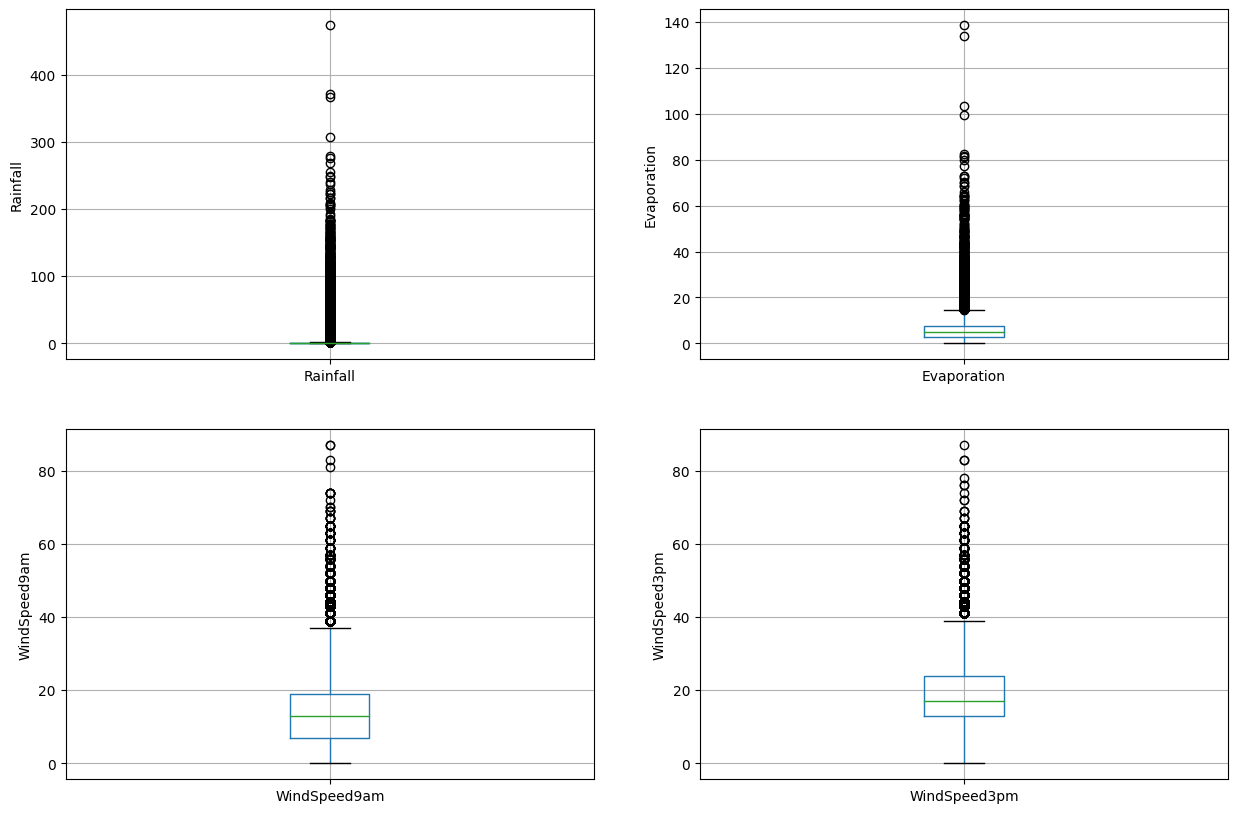

In [52]:
# draw boxplots to visualize outliers

plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = df.boxplot(column='Rainfall')
fig.set_title('')
fig.set_ylabel('Rainfall')


plt.subplot(2, 2, 2)
fig = df.boxplot(column='Evaporation')
fig.set_title('')
fig.set_ylabel('Evaporation')


plt.subplot(2, 2, 3)
fig = df.boxplot(column='WindSpeed9am')
fig.set_title('')
fig.set_ylabel('WindSpeed9am')


plt.subplot(2, 2, 4)
fig = df.boxplot(column='WindSpeed3pm')
fig.set_title('')
fig.set_ylabel('WindSpeed3pm')

После оценки данных на выбросы, в дальнейшем можно исследовать наши данные на соответствию нормальному распределению

Text(0, 0.5, 'RainTomorrow')

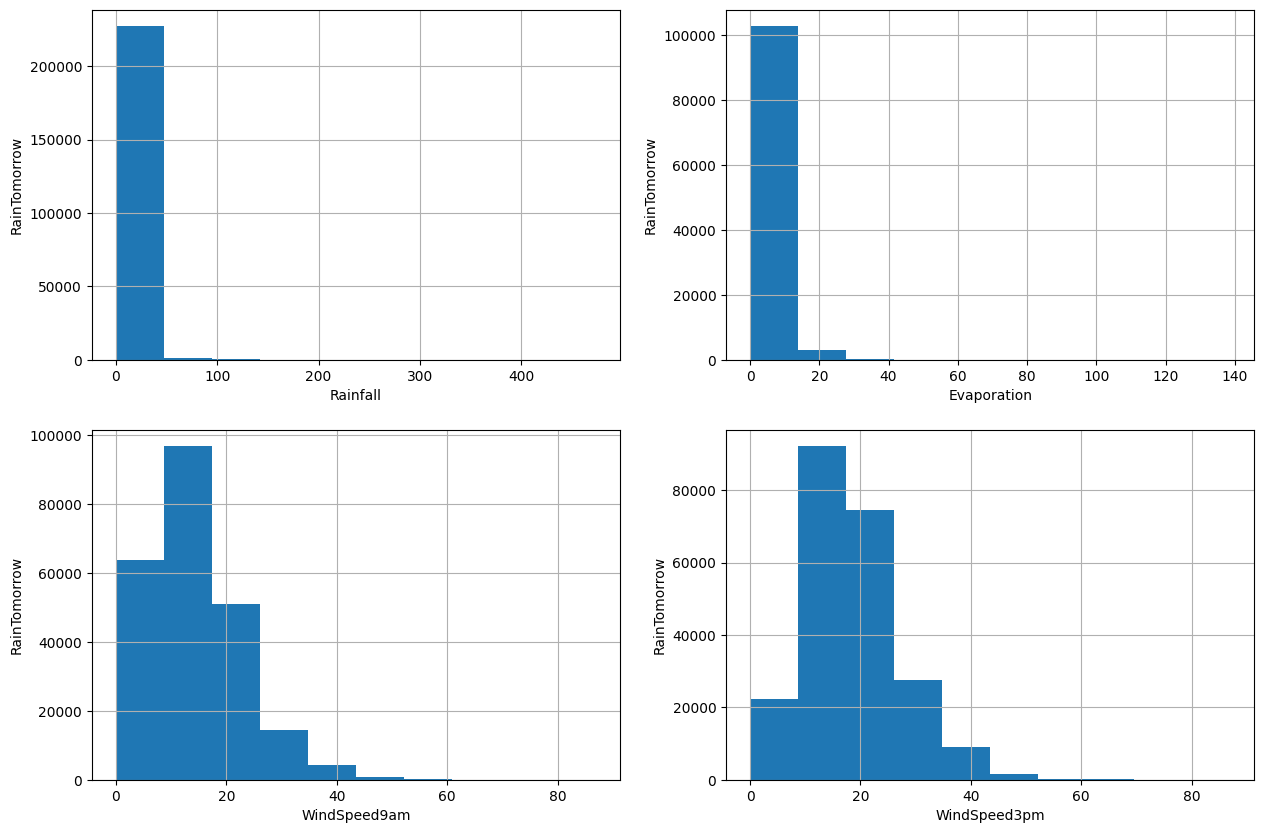

In [53]:
plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = df.Rainfall.hist(bins=10)
fig.set_xlabel('Rainfall')
fig.set_ylabel('RainTomorrow')


plt.subplot(2, 2, 2)
fig = df.Evaporation.hist(bins=10)
fig.set_xlabel('Evaporation')
fig.set_ylabel('RainTomorrow')


plt.subplot(2, 2, 3)
fig = df.WindSpeed9am.hist(bins=10)
fig.set_xlabel('WindSpeed9am')
fig.set_ylabel('RainTomorrow')


plt.subplot(2, 2, 4)
fig = df.WindSpeed3pm.hist(bins=10)
fig.set_xlabel('WindSpeed3pm')
fig.set_ylabel('RainTomorrow')

In [54]:
IQR= df.Rainfall.quantile(0.75)-df.Rainfall.quantile(0.25)
Lower_fence = df.Rainfall.quantile(0.25) - (IQR * 3)
Upper_fence = df.Rainfall.quantile(0.75) + (IQR * 3)
print('Rainfall outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

Rainfall outliers are values < -1.7999999999999998 or > 2.4


In [55]:
# find outliers for Evaporation variable

IQR = df.Evaporation.quantile(0.75) - df.Evaporation.quantile(0.25)
Lower_fence = df.Evaporation.quantile(0.25) - (IQR * 3)
Upper_fence = df.Evaporation.quantile(0.75) + (IQR * 3)
print('Evaporation outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

Evaporation outliers are values < -11.800000000000002 or > 21.800000000000004


In [56]:
IQR = df.WindSpeed9am.quantile(0.75) - df.WindSpeed9am.quantile(0.25)
Lower_fence = df.WindSpeed9am.quantile(0.25)-(IQR*3)
Upper_fence = df.WindSpeed9am.quantile(0.75)+(IQR*3)
print('Evaporation outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

Evaporation outliers are values < -29.0 or > 55.0


In [57]:
IQR = df.WindSpeed3pm.quantile(0.75) - df.WindSpeed3pm.quantile(0.25)
Lower_fence = df.WindSpeed3pm.quantile(0.25) - (IQR * 3)
Upper_fence = df.WindSpeed3pm.quantile(0.75) + (IQR * 3)
print('WindSpeed3pm outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

WindSpeed3pm outliers are values < -20.0 or > 57.0


Определяем искомое значение

In [58]:
X = df.drop(['RainTomorrow'], axis=1)
y = df['RainTomorrow']

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)


Фьючим нашу модель

In [60]:
X_train.dtypes

Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
Year               int64
Month              int64
Day                int64
dtype: object

In [61]:
categorical = [col for col in X_train.columns if X_train[col].dtypes == 'O']
categorical

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

In [62]:
numerical = [col for col in X_train.columns if X_train[col].dtypes != 'O']
numerical

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'Year',
 'Month',
 'Day']

In [63]:
X_train[numerical].isnull().sum()

MinTemp            3212
MaxTemp            3144
Rainfall           5728
Evaporation      103874
Sunshine         111641
WindGustSpeed     13971
WindSpeed9am       3756
WindSpeed3pm       6969
Humidity9am        4397
Humidity3pm        7995
Pressure9am       20822
Pressure3pm       20805
Cloud9am          83069
Cloud3pm          87634
Temp9am            3275
Temp3pm            6942
Year                  0
Month                 0
Day                   0
dtype: int64

In [64]:
X_test[numerical].isnull().sum()

MinTemp            843
MaxTemp            774
Rainfall          1371
Evaporation      26059
Sunshine         27947
WindGustSpeed     3441
WindSpeed9am       931
WindSpeed3pm      1653
Humidity9am       1122
Humidity3pm       1953
Pressure9am       5220
Pressure3pm       5213
Cloud9am         20931
Cloud3pm         22076
Temp9am            825
Temp3pm           1682
Year                 0
Month                0
Day                  0
dtype: int64

In [65]:
for col in numerical:
    if X_train[col].isnull().mean()>0:
        print(col, round(X_train[col].isnull().mean(),4))

MinTemp 0.017
MaxTemp 0.0167
Rainfall 0.0304
Evaporation 0.5509
Sunshine 0.5921
WindGustSpeed 0.0741
WindSpeed9am 0.0199
WindSpeed3pm 0.037
Humidity9am 0.0233
Humidity3pm 0.0424
Pressure9am 0.1104
Pressure3pm 0.1103
Cloud9am 0.4405
Cloud3pm 0.4648
Temp9am 0.0174
Temp3pm 0.0368


Отсутствующие значения необходимо заполнить медианным (даннный способ,в условиях выбросов, более подходящий для нашей модели). Сначала вменяем на тренировочный данных, потом переходим на тестовые ( это же в свою очередь позволит избежать переобучения)

In [66]:
for df1 in [X_train, X_test]:
  for col in numerical:
    col_median =X_train[col].median()
    df1[col].fillna(col_median, inplace=True)

In [67]:
X_train[numerical].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
Year             0
Month            0
Day              0
dtype: int64

In [68]:
X_test[numerical].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
Year             0
Month            0
Day              0
dtype: int64

Поработаем с пропущенными значениями в категориальных данных

In [69]:
X_train[categorical].isnull().mean()


Location       0.000000
WindGustDir    0.074576
WindDir9am     0.078792
WindDir3pm     0.043498
RainToday      0.030378
dtype: float64

In [70]:
for col in categorical:
  if X_train[col].isnull().mean() > 0:
    print(col, (X_train[col].isnull().mean()))

WindGustDir 0.07457612736597033
WindDir9am 0.07879231434193011
WindDir3pm 0.043498321480279385
RainToday 0.030377759746286308


In [71]:
for df2 in [X_train, X_test]:
    df2['WindGustDir'].fillna(X_train['WindGustDir'].mode()[0], inplace=True)
    df2['WindDir9am'].fillna(X_train['WindDir9am'].mode()[0], inplace=True)
    df2['WindDir3pm'].fillna(X_train['WindDir3pm'].mode()[0], inplace=True)
    df2['RainToday'].fillna(X_train['RainToday'].mode()[0], inplace=True)

In [72]:
X_train[categorical].isnull().sum()


Location       0
WindGustDir    0
WindDir9am     0
WindDir3pm     0
RainToday      0
dtype: int64

In [73]:
X_test[categorical].isnull().sum()

Location       0
WindGustDir    0
WindDir9am     0
WindDir3pm     0
RainToday      0
dtype: int64

In [74]:
X_train.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
Year             0
Month            0
Day              0
dtype: int64

In [75]:
X_test.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
Year             0
Month            0
Day              0
dtype: int64

Теперь стоит заняться работой над выбросами. Для дальнейшей модели необходимо убрать выбросы, чтобы повысить уровень работы модели

In [76]:
def max_value(df3, variable, top):
    return np.where(df3[variable]>top, top, df3[variable])

for df3 in [X_train, X_test]:
    df3['Rainfall'] = max_value(df3, 'Rainfall', 3.2)
    df3['Evaporation'] = max_value(df3, 'Evaporation', 21.8)
    df3['WindSpeed9am'] = max_value(df3, 'WindSpeed9am', 55)
    df3['WindSpeed3pm'] = max_value(df3, 'WindSpeed3pm', 57)

In [77]:
X_train.Rainfall.max(), X_test.Rainfall.max()

(3.2, 3.2)

In [78]:
X_train.Evaporation.max(), X_test.Evaporation.max()

(21.8, 21.8)

In [79]:
X_train.WindSpeed3pm.max(), X_test.WindSpeed3pm.max()


(57.0, 57.0)

In [80]:
X_train[numerical].describe()


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month,Day
count,188559.000000,188559.000000,188559.000000,188559.000000,188559.000000,188559.000000,188559.000000,188559.000000,188559.000000,188559.000000,188559.000000,188559.000000,188559.000000,188559.000000,188559.000000,188559.000000,188559.000000,188559.000000,188559.000000
mean,11.980398,23.089067,0.659607,5.072450,8.138311,39.864859,13.980362,18.470595,69.183126,51.563012,1017.691324,1015.262776,5.273861,4.832063,16.808257,21.564476,2015.896833,6.510631,15.729787
std,6.366354,7.052609,1.174825,2.485517,2.447921,13.009201,8.748972,8.528150,19.224054,20.576564,6.688005,6.638174,2.260552,2.026310,6.455776,6.842372,4.439476,3.398356,8.794565
min,-8.200000,-4.100000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,978.600000,972.000000,0.000000,0.000000,-6.200000,-5.100000,2007.000000,1.000000,1.000000
25%,7.500000,17.900000,0.000000,4.800000,8.500000,31.000000,7.000000,13.000000,57.000000,37.000000,1013.600000,1011.100000,5.000000,5.000000,12.200000,16.700000,2012.000000,4.000000,8.000000
50%,11.800000,22.500000,0.000000,4.800000,8.500000,39.000000,13.000000,17.000000,70.000000,52.000000,1017.600000,1015.200000,6.000000,5.000000,16.500000,21.000000,2015.000000,7.000000,16.000000
75%,16.500000,27.900000,0.600000,4.800000,8.500000,46.000000,19.000000,24.000000,83.000000,65.000000,1021.900000,1019.400000,6.000000,6.000000,21.300000,26.100000,2020.000000,9.000000,23.000000
max,33.900000,48.900000,3.200000,21.800000,14.500000,137.000000,55.000000,57.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,39.400000,48.200000,2023.000000,12.000000,31.000000


Начнем кодировать некоторые переменные

In [81]:
categorical

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

In [82]:
X_train[categorical].head()


,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday
190408,PerthAirport,W,NNE,WSW,No
57915,SydneyAirport,SSE,S,ESE,No
77793,Canberra,NNW,ESE,N,No
117875,Nhil,S,SSW,S,No
166196,Nuriootpa,W,W,WSW,No


In [83]:
!pip install category-encoders



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.0 MB/s eta 0:00:00


In [84]:
import category_encoders as ce


In [85]:
encoder = ce.BinaryEncoder(cols=['RainToday'])


In [86]:
X_train = encoder.fit_transform(X_train)


In [87]:
X_test = encoder.transform(X_test)


In [88]:
X_train = pd.concat([X_train[numerical], X_train[['RainToday_0', 'RainToday_1']],
                     pd.get_dummies(X_train.Location),
                     pd.get_dummies(X_train.WindGustDir),
                     pd.get_dummies(X_train.WindDir9am),
                     pd.get_dummies(X_train.WindDir3pm)], axis=1)

In [89]:
X_train

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
190408,11.0,31.6,0.0,7.4,13.0,41.0,26.0,26.0,23.0,24.0,...,0,0,0,0,0,0,0,0,0,1
57915,15.0,22.5,0.0,6.6,11.4,48.0,9.0,20.0,55.0,54.0,...,0,0,0,0,0,0,0,0,0,0
77793,0.4,18.1,0.0,4.8,8.5,20.0,4.0,13.0,80.0,42.0,...,0,0,0,0,0,0,0,0,0,0
117875,9.0,13.3,0.2,4.8,8.5,54.0,22.0,26.0,82.0,73.0,...,0,0,1,0,0,0,0,0,0,0
166196,10.6,15.3,0.0,0.4,4.4,39.0,17.0,26.0,96.0,74.0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176963,19.0,22.6,0.0,4.8,8.5,39.0,6.0,17.0,85.0,52.0,...,0,0,0,1,0,0,0,0,0,0
117952,11.1,18.3,1.0,4.8,8.5,54.0,22.0,28.0,87.0,67.0,...,1,0,0,0,0,0,0,0,0,0
173685,7.4,29.5,0.0,4.8,8.5,43.0,24.0,22.0,21.0,6.0,...,0,1,0,0,0,0,0,0,0,0
43567,17.5,35.2,0.0,6.4,8.5,39.0,11.0,15.0,70.0,40.0,...,0,0,0,0,0,0,0,0,0,0


In [90]:
X_train.head()


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
190408,11.0,31.6,0.0,7.4,13.0,41.0,26.0,26.0,23.0,24.0,...,0,0,0,0,0,0,0,0,0,1
57915,15.0,22.5,0.0,6.6,11.4,48.0,9.0,20.0,55.0,54.0,...,0,0,0,0,0,0,0,0,0,0
77793,0.4,18.1,0.0,4.8,8.5,20.0,4.0,13.0,80.0,42.0,...,0,0,0,0,0,0,0,0,0,0
117875,9.0,13.3,0.2,4.8,8.5,54.0,22.0,26.0,82.0,73.0,...,0,0,1,0,0,0,0,0,0,0
166196,10.6,15.3,0.0,0.4,4.4,39.0,17.0,26.0,96.0,74.0,...,0,0,0,0,0,0,0,0,0,1


In [91]:
X_test = pd.concat([X_test[numerical], X_test[['RainToday_0', 'RainToday_1']],
                     pd.get_dummies(X_test.Location),
                     pd.get_dummies(X_test.WindGustDir),
                     pd.get_dummies(X_test.WindDir9am),
                     pd.get_dummies(X_test.WindDir3pm)], axis=1)

Почти все готово для построение модели, осталось разобраться с масштабом

In [92]:
X_train.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
count,188559.000000,188559.000000,188559.000000,188559.000000,188559.000000,188559.000000,188559.000000,188559.000000,188559.000000,188559.000000,...,188559.000000,188559.000000,188559.000000,188559.000000,188559.000000,188559.000000,188559.000000,188559.000000,188559.000000,188559.000000
mean,11.980398,23.089067,0.659607,5.072450,8.138311,39.864859,13.980362,18.470595,69.183126,51.563012,...,0.053050,0.057584,0.065788,0.115089,0.061583,0.057070,0.061890,0.068392,0.061058,0.064988
std,6.366354,7.052609,1.174825,2.485517,2.447921,13.009201,8.748972,8.528150,19.224054,20.576564,...,0.224133,0.232956,0.247913,0.319130,0.240397,0.231976,0.240957,0.252419,0.239437,0.246505
min,-8.200000,-4.100000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.500000,17.900000,0.000000,4.800000,8.500000,31.000000,7.000000,13.000000,57.000000,37.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,11.800000,22.500000,0.000000,4.800000,8.500000,39.000000,13.000000,17.000000,70.000000,52.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,16.500000,27.900000,0.600000,4.800000,8.500000,46.000000,19.000000,24.000000,83.000000,65.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,33.900000,48.900000,3.200000,21.800000,14.500000,137.000000,55.000000,57.000000,100.000000,100.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [93]:
cols = X_train.columns

In [94]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [95]:
X_train = pd.DataFrame(X_train, columns=[cols])


In [96]:
X_train

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
0,0.456057,0.673585,0.0000,0.339450,0.896552,0.288889,0.472727,0.456140,0.23,0.24,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.551069,0.501887,0.0000,0.302752,0.786207,0.340741,0.163636,0.350877,0.55,0.54,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.204276,0.418868,0.0000,0.220183,0.586207,0.133333,0.072727,0.228070,0.80,0.42,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.408551,0.328302,0.0625,0.220183,0.586207,0.385185,0.400000,0.456140,0.82,0.73,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.446556,0.366038,0.0000,0.018349,0.303448,0.274074,0.309091,0.456140,0.96,0.74,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188554,0.646081,0.503774,0.0000,0.220183,0.586207,0.274074,0.109091,0.298246,0.85,0.52,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
188555,0.458432,0.422642,0.3125,0.220183,0.586207,0.385185,0.400000,0.491228,0.87,0.67,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
188556,0.370546,0.633962,0.0000,0.220183,0.586207,0.303704,0.436364,0.385965,0.21,0.06,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
188557,0.610451,0.741509,0.0000,0.293578,0.586207,0.274074,0.200000,0.263158,0.70,0.40,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [97]:
X_test = pd.DataFrame(X_test, columns=[cols])


In [98]:
X_train.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
count,188559.000000,188559.000000,188559.000000,188559.000000,188559.000000,188559.000000,188559.000000,188559.000000,188559.000000,188559.000000,...,188559.000000,188559.000000,188559.000000,188559.000000,188559.000000,188559.000000,188559.000000,188559.000000,188559.000000,188559.000000
mean,0.479344,0.513001,0.206127,0.232681,0.561263,0.280480,0.254188,0.324046,0.691831,0.515630,...,0.053050,0.057584,0.065788,0.115089,0.061583,0.057070,0.061890,0.068392,0.061058,0.064988
std,0.151220,0.133068,0.367133,0.114015,0.168822,0.096364,0.159072,0.149617,0.192241,0.205766,...,0.224133,0.232956,0.247913,0.319130,0.240397,0.231976,0.240957,0.252419,0.239437,0.246505
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.372922,0.415094,0.000000,0.220183,0.586207,0.214815,0.127273,0.228070,0.570000,0.370000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.475059,0.501887,0.000000,0.220183,0.586207,0.274074,0.236364,0.298246,0.700000,0.520000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.586698,0.603774,0.187500,0.220183,0.586207,0.325926,0.345455,0.421053,0.830000,0.650000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [99]:
X_test.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
count,47140.000000,47140.000000,47140.000000,47140.000000,47140.000000,47140.000000,47140.000000,47140.000000,47140.000000,47140.000000,...,47140.000000,47140.000000,47140.000000,47140.000000,47140.000000,47140.000000,47140.000000,47140.000000,47140.000000,47140.000000
mean,0.478753,0.512386,0.206061,0.232288,0.561602,0.280830,0.255011,0.324797,0.691435,0.516009,...,0.052524,0.058273,0.066059,0.115146,0.063195,0.057213,0.062176,0.068392,0.060713,0.064616
std,0.150502,0.132685,0.367211,0.113337,0.168937,0.096666,0.158781,0.149613,0.191000,0.205562,...,0.223084,0.234262,0.248387,0.319202,0.243315,0.232251,0.241478,0.252420,0.238805,0.245850
min,-0.011876,0.005660,0.000000,0.000000,0.000000,0.029630,0.000000,0.000000,0.010000,0.010000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.372922,0.415094,0.000000,0.220183,0.586207,0.214815,0.127273,0.228070,0.570000,0.370000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.475059,0.501887,0.000000,0.220183,0.586207,0.274074,0.236364,0.298246,0.700000,0.520000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.586698,0.603774,0.187500,0.220183,0.586207,0.325926,0.345455,0.421053,0.830000,0.650000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.940618,0.977358,1.000000,1.000000,0.993103,0.985185,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Тренировка модели

In [100]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='liblinear', random_state=0)

In [101]:
for df2 in [y_test]:
    df2.fillna(y_test.mode()[0], inplace=True)
for df2 in [y_train]:
    df2.fillna(y_test.mode()[0], inplace=True)



In [102]:
logreg.fit(X_train, y_train)


LogisticRegression(random_state=0, solver='liblinear')

Предсказываем результаты

In [103]:
y_pred_test=logreg.predict(X_test)
y_pred_test

array(['Yes', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [104]:
logreg.predict_proba(X_test)[:,0]
logreg.predict_proba(X_test)[:,1]


array([0.6362835 , 0.09243087, 0.05554078, ..., 0.37557605, 0.40738752,
       0.03025924])

In [106]:
from sklearn.metrics import accuracy_score


In [107]:
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))


Model accuracy score: 0.8504


In [108]:
y_pred_train = logreg.predict(X_train)
y_pred_train

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [109]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))


Training-set accuracy score: 0.8508


In [110]:
print('Training set score: {:.4f}'.format(logreg.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(logreg.score(X_test, y_test)))

Training set score: 0.8508
Test set score: 0.8504


In [111]:
logreg100 = LogisticRegression(C=100, solver='liblinear', random_state=0)
logreg100.fit(X_train, y_train)

LogisticRegression(C=100, random_state=0, solver='liblinear')

In [112]:
print('Training set score: {:.4f}'.format(logreg100.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(logreg100.score(X_test, y_test)))

Training set score: 0.8510
Test set score: 0.8504


In [113]:
logreg001 = LogisticRegression(C=0.01, solver='liblinear', random_state=0)
logreg001.fit(X_train, y_train)


LogisticRegression(C=0.01, random_state=0, solver='liblinear')

In [114]:
print('Training set score: {:.4f}'.format(logreg001.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(logreg001.score(X_test, y_test)))

Training set score: 0.8462
Test set score: 0.8460


In [115]:
y_test.value_counts()

No     37024
Yes    10116
Name: RainTomorrow, dtype: int64

In [116]:
null_accuracy = (22067/(22067+6372))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.7759


Нулевая оценка дает понять нам, что уровень прогнозирования нашей модели достаточн высок.
В дальнейшем стоит построить сonfusion matrix

In [118]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_test)
print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[35055  1969]
 [ 5083  5033]]

True Positives(TP) =  35055

True Negatives(TN) =  5033

False Positives(FP) =  1969

False Negatives(FN) =  5083


<Axes: >

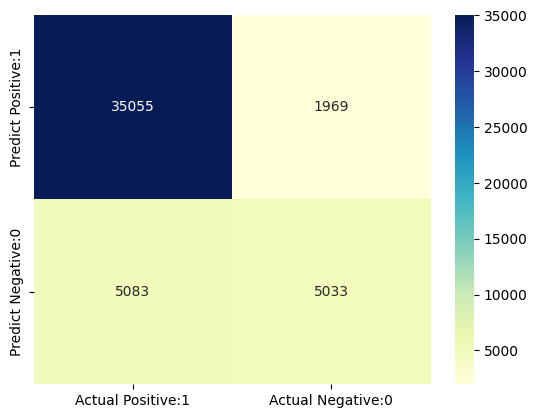

In [121]:
cm_matrix =pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')


Используем метрики классификации

In [122]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

          No       0.87      0.95      0.91     37024
         Yes       0.72      0.50      0.59     10116

    accuracy                           0.85     47140
   macro avg       0.80      0.72      0.75     47140
weighted avg       0.84      0.85      0.84     47140



In [123]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [124]:
classification_accuracy = (TP+TN)/float(TP+TN+FP+FN)
print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))


Classification accuracy : 0.8504


In [125]:
classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.1496


In [127]:
precision = TP / float(TP + FP)
print('Precision : {0:0.4f}'.format(precision))


Precision : 0.9468


In [128]:
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.8734


In [129]:
true_positive_rate = TP/float(TP+FN)

In [130]:
false_positive_rate = FP / float(FP + TN)




In [131]:
specificity = TN / (TN + FP)


Настройка порогового уровня

In [133]:
y_pred_prob = logreg.predict_proba(X_test)[0:10]
y_pred_prob

array([[0.3637165 , 0.6362835 ],
       [0.90756913, 0.09243087],
       [0.94445922, 0.05554078],
       [0.97831819, 0.02168181],
       [0.65867631, 0.34132369],
       [0.91083565, 0.08916435],
       [0.59938311, 0.40061689],
       [0.96066332, 0.03933668],
       [0.80541624, 0.19458376],
       [0.81297798, 0.18702202]])

In [134]:
y_pred_prob_df = pd.DataFrame(data=y_pred_prob, columns=['Prob of - No rain tomorrow (0)', 'Prob of - Rain tomorrow (1)'])

In [135]:
y_pred_prob_df

,Prob of - No rain tomorrow (0),Prob of - Rain tomorrow (1)
0,0.363717,0.636283
1,0.907569,0.092431
2,0.944459,0.055541
3,0.978318,0.021682
4,0.658676,0.341324
5,0.910836,0.089164
6,0.599383,0.400617
7,0.960663,0.039337
8,0.805416,0.194584
9,0.812978,0.187022


In [142]:
logreg.predict_proba(X_test)[0:10, 1]


array([0.6362835 , 0.09243087, 0.05554078, 0.02168181, 0.34132369,
       0.08916435, 0.40061689, 0.03933668, 0.19458376, 0.18702202])

In [148]:
y_pred1 = logreg.predict_proba(X_test)[:, 1]


In [151]:
plt.rcParams['font.size'] = 12
y_pred1 = logreg.predict_proba(X_test)[:, 1]


Text(0, 0.5, 'Frequency')

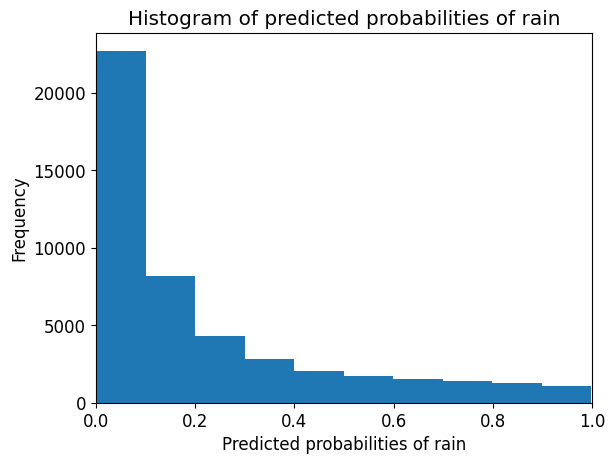

In [152]:
# plot histogram of predicted probabilities


# adjust the font size
plt.rcParams['font.size'] = 12


# plot histogram with 10 bins
plt.hist(y_pred1, bins = 10)


# set the title of predicted probabilities
plt.title('Histogram of predicted probabilities of rain')


# set the x-axis limit
plt.xlim(0,1)


# set the title
plt.xlabel('Predicted probabilities of rain')
plt.ylabel('Frequency')


In [156]:
from sklearn.preprocessing import binarize

for i in range(1,5):
    cm1=0
    y_pred1 = logreg.predict_proba(X_test)[:,1]
    y_pred1 = y_pred1.reshape(-1,1)
    y_pred2 = binarize(y_pred1, i/10)
    y_pred2 = np.where(y_pred2 == 1, 'Yes', 'No')
    cm1 = confusion_matrix(y_test, y_pred2)



TypeError: ignored

ROC - AUC

In [160]:
from sklearn.metrics import roc_curve


Text(0, 0.5, 'True Positive Rate (Sensitivity)')

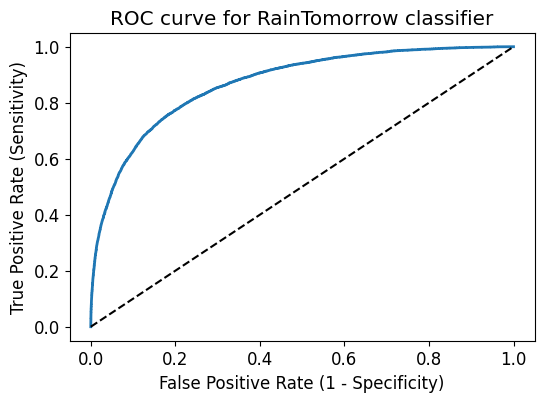

In [166]:

fpr, tpr, thresholds = roc_curve(y_test, y_pred1, pos_label = 'Yes')

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size']=12
plt.title('ROC curve for RainTomorrow classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')


In [168]:
from sklearn.metrics import roc_auc_score
ROC_AUC = roc_auc_score(y_test, y_pred1)
print('ROC AUC : {:.4f}'.format(ROC_AUC))


ROC AUC : 0.8696


In [169]:
from sklearn.model_selection import cross_val_score
Cross_validated_ROC_AUC = cross_val_score(logreg, X_train, y_train, cv=5, scoring='roc_auc').mean()

print('Cross validated ROC AUC : {:.4f}'.format(Cross_validated_ROC_AUC))

Cross validated ROC AUC : 0.8698


In [170]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(logreg, X_train, y_train, cv = 5, scoring='accuracy')
print('Cross-validation scores:{}'.format(scores))


Cross-validation scores:[0.85007425 0.84850976 0.85073717 0.85264637 0.85062714]


In [171]:
print('Average cross-validation score: {:.4f}'.format(scores.mean()))


Average cross-validation score: 0.8505


In [172]:
from sklearn.model_selection  import GridSearchCV

In [173]:
parameters = [{'penalty':['l1','l2']},
              {'C':[1, 10, 100, 1000]}]


In [175]:
grid_search = GridSearchCV(estimator = logreg, param_grid= parameters, scoring='accuracy', cv = 5, verbose=0)
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=LogisticRegression(random_state=0, solver='liblinear'),
             param_grid=[{'penalty': ['l1', 'l2']}, {'C': [1, 10, 100, 1000]}],
             scoring='accuracy')

In [ ]:
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))

# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid_search.best_params_))

# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search.best_estimator_))

По итогам мы получили логистическую модель, которые достаточно хорошо предсказывает вероятность дождя в Австралии